In [38]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('data/mushrooms.csv', encoding='UTF-8')


In [39]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [40]:
del df['veil-type'] # since only one type as seen above del

In [41]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,4,9,9,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,s,w,w,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,5176,4936,4464,4384,7924,7488,3968,2388,4040,3148


In [42]:
X = df.drop('class', axis=1)
y = df['class']
y = y.map({'p': 'Posionous', 'e': 'Edible'}) 

In [43]:
X_ohe = pd.get_dummies(X, drop_first=True)
X_ohe.sample(5)

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
5661,False,True,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
1876,False,False,False,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
6855,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4793,False,True,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
1659,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [44]:
X_std = StandardScaler().fit_transform(X_ohe)
X_std

array([[-0.02219484, -0.79620985, -0.33687808, ..., -0.40484176,
         4.59086996, -0.15558197],
       [-0.02219484, -0.79620985, -0.33687808, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.02219484, -0.79620985, -0.33687808, ..., -0.40484176,
        -0.21782364, -0.15558197],
       ...,
       [-0.02219484,  1.2559503 , -0.33687808, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.02219484, -0.79620985,  2.96843295, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.02219484, -0.79620985, -0.33687808, ..., -0.40484176,
        -0.21782364, -0.15558197]])

In [51]:
X_pca = PCA(n_components=3)
components = X_pca.fit_transform(X_std)
principal_components = X_pca.components_
print(principal_components)


[[-5.03259084e-03  3.50371354e-02  1.68994656e-02 -1.77508343e-02
  -7.41127487e-03 -7.74465579e-03 -8.01813874e-02  5.58243578e-02
  -2.11361276e-04  1.26054098e-02  6.11379848e-02 -5.64069051e-02
  -3.98027180e-02  1.82232404e-03  1.82232066e-03 -1.06103270e-01
   1.13557891e-01 -1.84544180e-01 -3.42295189e-02  2.59621299e-01
  -7.28234668e-02  1.70381975e-03 -1.83406455e-01 -6.33546590e-02
   4.29068322e-02  4.29068438e-02  6.38240126e-02 -9.52419319e-02
   3.19275283e-02 -3.78923660e-02  8.51734853e-02  1.05365517e-01
  -7.32003213e-02 -9.97298991e-02 -3.90985595e-02  2.64437787e-02
  -1.96675666e-02 -4.57862842e-02 -8.21054695e-02 -3.27098852e-02
  -5.45674510e-02  1.02810252e-01 -8.75633208e-02 -1.06183458e-01
  -3.07762115e-02  2.72844865e-01 -2.38431479e-01  2.79514229e-03
   2.73286264e-01 -2.24861868e-01 -2.09805877e-02  1.70381975e-03
  -3.71434974e-02 -5.18001268e-02  1.58352448e-01 -6.67182909e-02
   1.07807326e-01 -1.72699369e-01 -2.67807007e-03  1.70381975e-03
  -3.71294

In [46]:
y.head()

0    Posionous
1       Edible
2       Edible
3    Posionous
4       Edible
Name: class, dtype: object

In [47]:
X_pca_class = np.vstack((components.T, y)).T
X_pca_class

array([[-3.680148236549771, -1.4844807073366564, -0.6372665056014183,
        'Posionous'],
       [-2.864403059371986, -1.7673845030751045, 1.2944942929356893,
        'Edible'],
       [-4.093188379833242, -1.8731293199973615, 1.2742314232425656,
        'Edible'],
       ...,
       [-3.944374649948281, 12.33545851722572, 6.363598157885691,
        'Edible'],
       [0.7332201584940966, 2.3231310208129954, -4.286978864303611,
        'Posionous'],
       [-4.501023654614587, 16.3963514788709, 8.537558723789857,
        'Edible']], dtype=object)

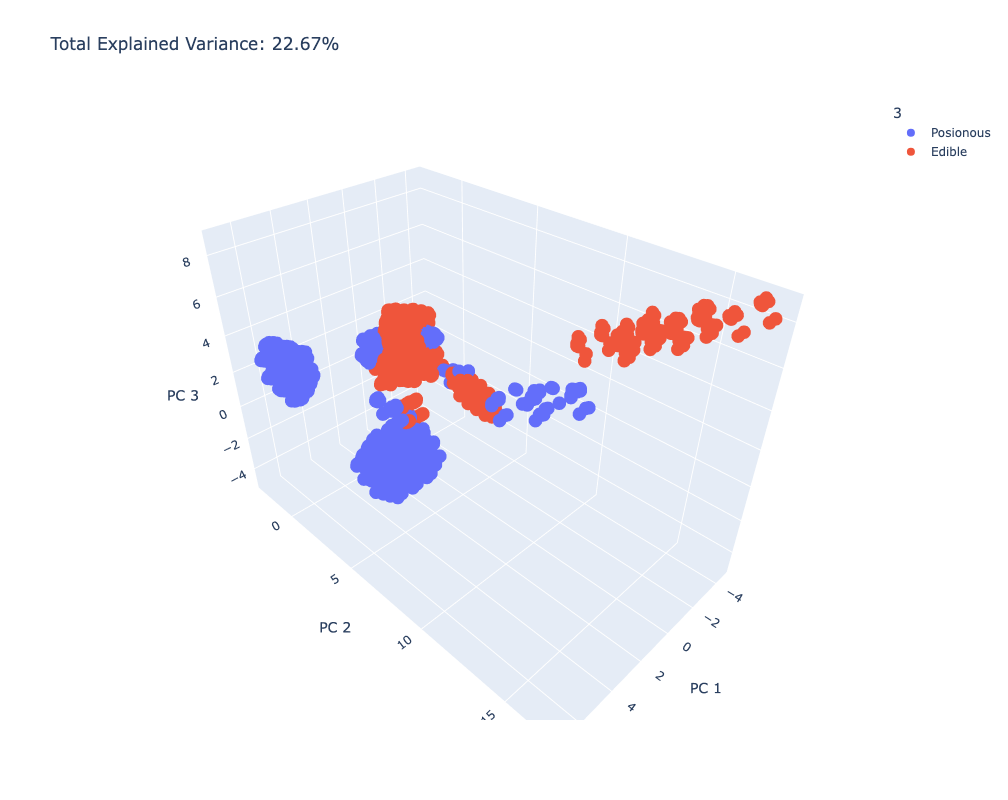

In [48]:
total_var = X_pca.explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(
    X_pca_class, x=0, y=1, z=2, color=3,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.update_layout(width=800, height=800)
fig.show()

**TNSE**

In [35]:
tsne = TSNE(n_components=3, random_state=0, perplexity = 500)
X_tsne = tsne.fit_transform(X_std)
X_tsne

array([[ -4.944194 , -11.776729 ,   7.72797  ],
       [-12.53022  ,  -1.7631897,   7.5850043],
       [-16.623058 ,  -2.0956566,   7.268963 ],
       ...,
       [  0.5873544,   2.4601972, -12.708975 ],
       [  3.808494 ,   8.774702 ,  -6.3276496],
       [  2.4912872,   1.9398936, -11.577687 ]], dtype=float32)

In [36]:
X_tsne_class = np.vstack((X_tsne.T, y)).T
X_tsne_class

array([[-4.9441938400268555, -11.776728630065918, 7.727970123291016,
        'Posionous'],
       [-12.530220031738281, -1.763189673423767, 7.5850043296813965,
        'Edible'],
       [-16.623058319091797, -2.095656633377075, 7.268962860107422,
        'Edible'],
       ...,
       [0.5873544216156006, 2.4601972103118896, -12.708974838256836,
        'Edible'],
       [3.8084940910339355, 8.774702072143555, -6.3276495933532715,
        'Posionous'],
       [2.4912872314453125, 1.9398936033248901, -11.57768726348877,
        'Edible']], dtype=object)

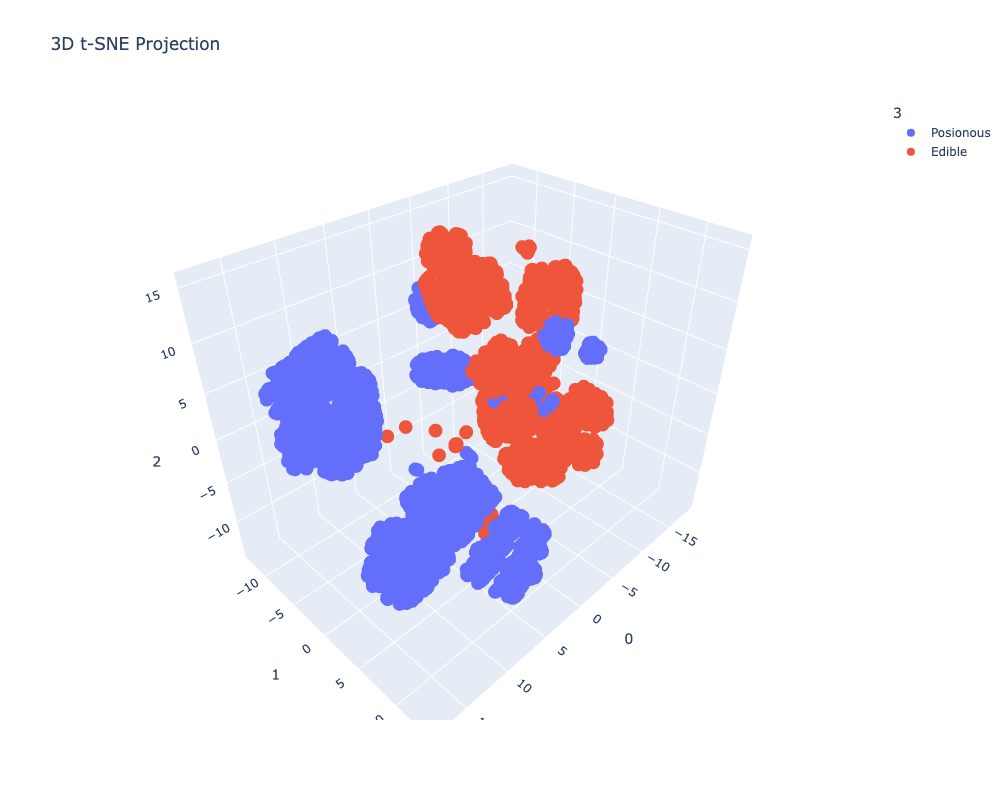

In [53]:
fig = px.scatter_3d(X_tsne_class, 
                    x=0, y=1, z=2, color=3,
                    title='3D t-SNE Projection')
fig.update_layout(width=800, height=800)
fig.show()